## Hypothesis
The gyroscope readings (X, Y, Z axes) should display consistent patterns, particularly when the device undergoes smooth, repetitive motions. If there are rapid spikes or dips, they might indicate abrupt movements or me getting tired moving the chair.

## Data Collection 
I collected gyroscope data (X, Y, Z axes) to analyze the rotational movement of the device while spinning myself and moving sitting in a desk chair. This can be used to detect orientation changes, motion patterns, or even sudden movements like shakes or twists.

I Collected the data continuously over a period of around 10 minutes. Sampling at 1-second intervals should provide enough granularity to identify meaningful changes in motion.

## Observation and Analysis
Pattern Observation:

Repeating Patterns: I moved the device in a cyclic motion so you'll see repeating patterns but i made sure to change directing and move around to get various data. You may observe downward trends in the axes if the device is slowly tilted in a single direction.
Relative Changes: By plotting all three axes together, you can see how the X, Y, and Z gyroscope readings change relative to one another. 

If the hypothesis is that there will be a repeating pattern during a circular or repetitive motion, and the data supports this, the hypothesis holds.
If the hypothesis doesn’t hold, potential reasons could be inconsistencies in the motion, errors in the sensor readings, or environmental factors.

In [5]:
import firebase_admin
from firebase_admin import credentials, db
import pandas as pd
import csv
import time

# Initialize Firebase
cred_obj = firebase_admin.credentials.Certificate(
    r'C:\Users\ramma\Downloads\sit225-5-firebase-adminsdk-o982n-f4f8bea959.json'
)
firebase_admin.initialize_app(cred_obj, {
    'databaseURL': 'https://sit225-5-default-rtdb.firebaseio.com/'
})

# Reference to the Firebase data
ref = db.reference('/mpu6050_data')

# Get all data
all_data = ref.get()

# Convert data to CSV format and save as a CSV file
with open('gyro_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["timestamp", "gyro_x", "gyro_y", "gyro_z"])
    
    # Write the data
    for key, value in all_data.items():
        writer.writerow([value["timestamp"], value["gyro_x"], value["gyro_y"], value["gyro_z"]])

# Load the CSV into a Pandas DataFrame for cleaning and analysis
df = pd.read_csv('gyro_data.csv')

# Cleaning the data (removing non-number and empty fields)
df.dropna(inplace=True)  # Removes rows with empty fields

# Save the cleaned data back to CSV
df.to_csv('cleaned_gyro_data.csv', index=False)

print("Cleaned data saved to 'cleaned_gyro_data.csv'")


Cleaned data saved to 'cleaned_gyro_data.csv'


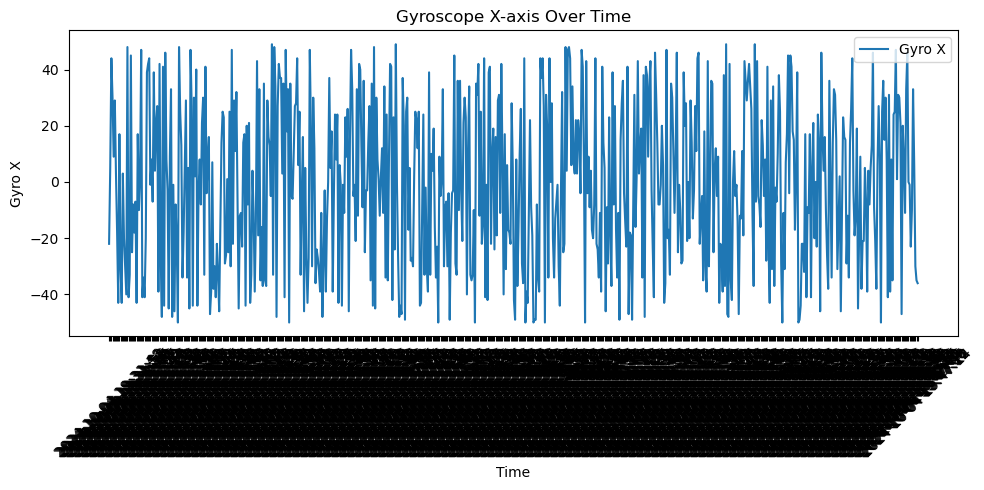

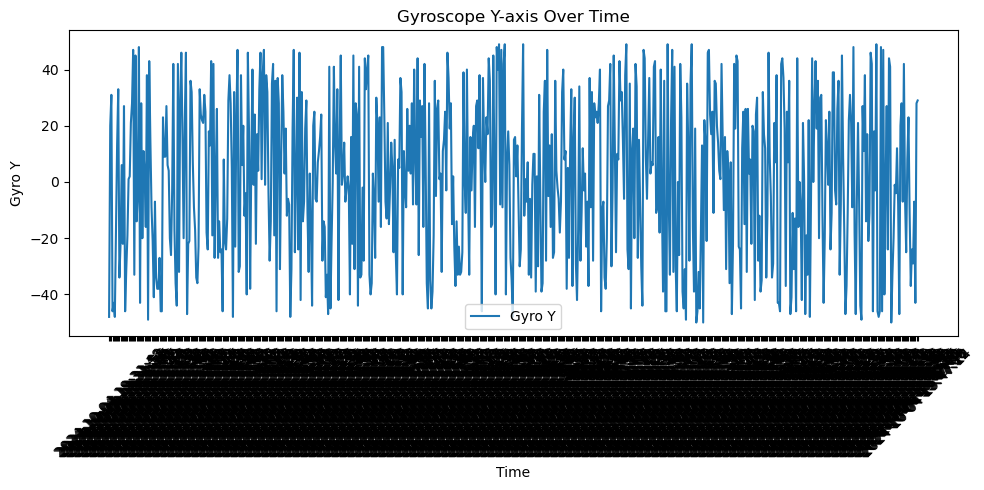

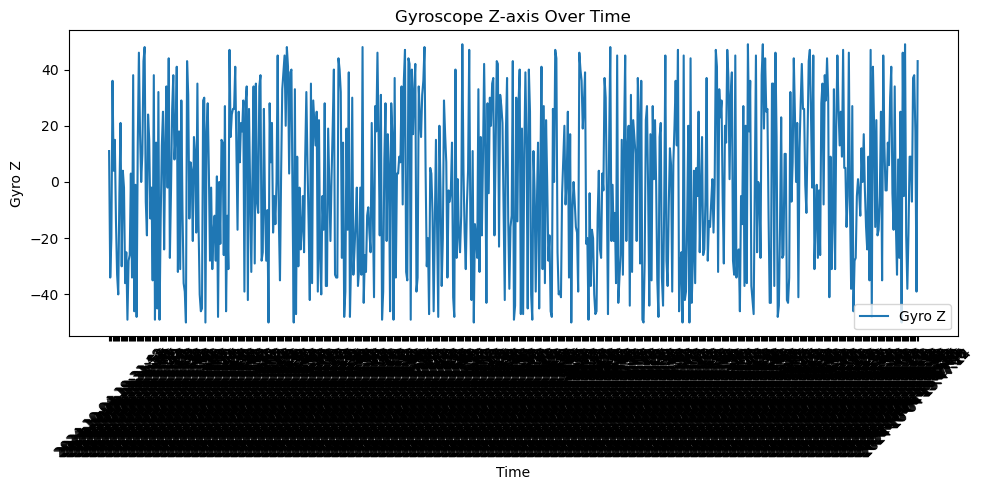

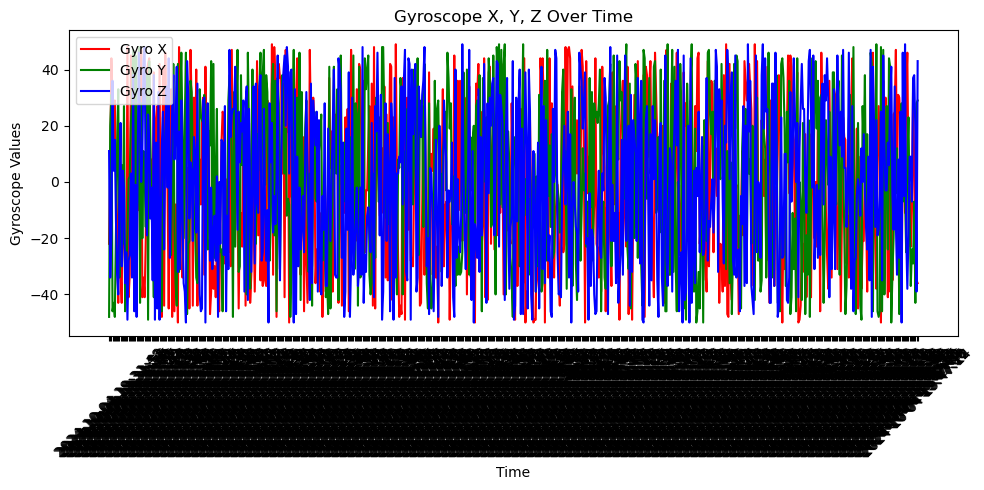

In [8]:
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_gyro_data.csv')

# Plot X-axis Gyroscope data
plt.figure(figsize=(10,5))
plt.plot(df['timestamp'], df['gyro_x'], label='Gyro X')
plt.xlabel('Time')
plt.ylabel('Gyro X')
plt.title('Gyroscope X-axis Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot Y-axis Gyroscope data
plt.figure(figsize=(10,5))
plt.plot(df['timestamp'], df['gyro_y'], label='Gyro Y')
plt.xlabel('Time')
plt.ylabel('Gyro Y')
plt.title('Gyroscope Y-axis Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot Z-axis Gyroscope data
plt.figure(figsize=(10,5))
plt.plot(df['timestamp'], df['gyro_z'], label='Gyro Z')
plt.xlabel('Time')
plt.ylabel('Gyro Z')
plt.title('Gyroscope Z-axis Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot all three axes in one graph for comparison
plt.figure(figsize=(10,5))
plt.plot(df['timestamp'], df['gyro_x'], label='Gyro X', color='red')
plt.plot(df['timestamp'], df['gyro_y'], label='Gyro Y', color='green')
plt.plot(df['timestamp'], df['gyro_z'], label='Gyro Z', color='blue')
plt.xlabel('Time')
plt.ylabel('Gyroscope Values')
plt.title('Gyroscope X, Y, Z Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
